In [15]:
%run closest_versus_minimal_tools.ipynb
%run descent_tools.ipynb
%run case_study_tools.ipynb

In [16]:
case000 = {"B": [[4, 26, -8], [24, -1, -38], [47, -29, -38]], 
        "G": [[756, 374, -262], [374, 2021, 2601], [-262, 2601, 4494]],
        "lincomb_LLL": [1.0, 0.0, 0.0],
        "lincomb_cube": [1.0, -1.019439697265625, 0.6483230590820312],
        "sv_LLL": [4.0, 26.0, -8.0],
        "sv_cube": [10.004638671875, 8.21807861328125, 6.1024169921875],
        "lincomb_diff": [0.0, 1.019439697265625, -0.6483230590820312],
        "Diff impact": [0.0, 0.0, 0.0, 0.0, 2100.34, -1719.07, 0.0, -1719.07, 1888.93]} # caseID 000

case001 = {"B": [[2, -12, 3], [4, -4, 10], [-34, 40, -19]], 
        "G": [[157, 86, -605], [86, 132, -486], [-605, -486, 3117]], 
        "lincomb_LLL": [-1.0, 1.0, 0.0], 
        "lincomb_cube": [-1.0, -0.1481785774230957, -0.21720075607299805], 
        "sv_LLL": [2.0, 8.0, 7.0], 
        "sv_cube": [4.7921142578125, 3.9046783447265625, -0.3549652099609375], 
        "lincomb_diff": [0.0, 1.1481781005859375, 0.21720075607299805], 
        "Diff impact": [0.0, 0.0, -0.0, 0.0, 174.02, -121.2, -0.0, -121.2, 147.05]} #caseID 001

case002 = {"B": [[20, -11, 8], [47, -37, 27], [22, -9, -3]], 
        "G": [[585, 1563, 515], [1563, 4307, 1286], [515, 1286, 574]], 
        "lincomb_LLL": [-1.0, 0.0, 1.0], 
        "lincomb_cube": [-2.715618133544922, 0.6869077682495117, 1.0], 
        "sv_LLL": [2.0, 2.0, -11.0], 
        "sv_cube": [-0.0277099609375, -4.543792724609375, -6.178436279296875], 
        "lincomb_diff": [1.7156181335449219, -0.6869077682495117, 0.0], 
        "Diff impact": [1721.86, -1841.95, 0.0, -1841.95, 2032.22, -0.0, 0.0, -0.0, 0.0]} # caseID 002

case003 = {"B": [[6, -17, 3], [-15, 11, 0], [46, -49, -9]], 
           "G": [[334, -277, 1082], [-277, 346, -1229], [1082, -1229, 4598]], 
           "lincomb_LLL": [1.0, 1.0, 0.0], 
           "lincomb_cube": [1.0, -0.6975774765014648, -0.42177534103393555], 
           "sv_LLL": [-9.0, -6.0, 3.0], 
           "sv_cube": [-2.93798828125, -4.00634765625, 6.7959747314453125], 
           "lincomb_diff": [0.0, 1.6975784301757812, 0.42177534103393555], 
           "Diff impact": [0.0, -0.0, 0.0, -0.0, 997.09, -879.96, 0.0, -879.96, 817.96]} # caseID 003


case4x4_001 = {"B": [[22, -4, -20, -22], [11, -35, 38, -42], [34, -38, -26, -41], [-16, -40, -24, 44]], 
               "G": [[1384, 546, 2322, -680], [546, 4554, 2438, -1536], [2322, 2438, 4957, -204], [-680, -1536, -204, 4368]], 
               "lincomb_LLL": [3.0, 1.0, -2.0, 1.0], 
               "lincomb_cube": [4.4086761474609375, 1.2111663818359375, -2.6196823120117188, 1.0], 
               "sv_LLL": [-7.0, -11.0, 6.0, 18.0], 
               "sv_cube": [5.2445068359375, -0.4775390625, 1.96240234375, 3.547119140625], 
               "lincomb_diff": [-1.4086761474609375, -0.2111663818359375, 0.6196823120117188, 0.0]}


case4x4_002 = {"B": [[46, 9, 12, -28], [-20, -7, 23, 34], [0, 5, 31, -3], [-41, -16, -28, 34]], 
               "G": [[3125, -1659, 501, -3318], [-1659, 2134, 576, 1444], [501, 576, 995, -1050], [-3318, 1444, -1050, 3877]], 
               "lincomb_LLL": [-2.0, 0.0, -1.0, -2.0], 
               "lincomb_cube": [-2.0, 0.8417301177978516, -2.2645111083984375, -2.6384315490722656], 
               "sv_LLL": [-10.0, 9.0, 1.0, -9.0], 
               "sv_cube": [-0.658935546875, 7.000244140625, -0.9639892578125, 1.705810546875], 
               "lincomb_diff": [0.0, -0.8417301177978516, 1.2645111083984375, 0.6384315490722656]}

case4x4_003 = {"B": [[-29, 27, -8, 12], [-23, -32, -46, 8], [-14, 1, 20, 16], [12, -27, -50, -36]], 
                "G": [[1778, 267, 465, -1109], [267, 3733, -502, 2600], [465, -502, 853, -1771], [-1109, 2600, -1771, 4669]], 
                "lincomb_LLL": [0.0, 0.0, 1.0, 0.0], 
                "lincomb_cube": [0.1220695972442627, -0.25914478302001953, 1.0, 0.5526132583618164], 
                "sv_LLL": [-14.0, 1.0, 20.0, 16.0], 
                "sv_cube": [-4.948333740234375, -2.3320465087890625, 3.31341552734375, -4.5023956298828125], 
                "lincomb_diff": [-0.1220695972442627, 0.25914478302001953, 0.0, -0.5526132583618164]} 
# this one is functioning

case = case4x4_003





In [30]:
B = case["B"]
G = case["G"]
lc_LLL = case["lincomb_LLL"]
lc_cube = case["lincomb_cube"]
sv_LLL = case["sv_LLL"]
sv_cube = case["sv_cube"]
lincomb_diff = case["lincomb_diff"]

dimension = len(G)
cube = cube_points(lc_cube)
index = get_index_to_remove(lc_cube, lc_LLL)


print("LLL norm ", vector(sv_LLL).norm())
print("cube norm", vector(sv_cube).norm())

LLL norm  29.2061637330205
cube norm 7.82142804024480


In [18]:
print(matrix(G), "matrixG")
for i in range(dimension):
    print("Norm of the {}-th vector is {}".format(i, sqrt(G[i][i]).n(digits=4)))

[ 1778   267   465 -1109]
[  267  3733  -502  2600]
[  465  -502   853 -1771]
[-1109  2600 -1771  4669] matrixG
Norm of the 0-th vector is 42.17
Norm of the 1-th vector is 61.10
Norm of the 2-th vector is 29.21
Norm of the 3-th vector is 68.33


In [19]:
cosine_matrix = [[0] * dimension for _ in range(dimension)]
for i in range(dimension):
    for j in range(dimension):
        cosine_matrix[i][j] = (G[i][j] / sqrt(G[i][i] * G[j][j])).n(digits=3)

print(matrix(cosine_matrix), "cosine matrix")


[  1.00  0.104  0.378 -0.385]
[ 0.104   1.00 -0.281  0.623]
[ 0.378 -0.281   1.00 -0.887]
[-0.385  0.623 -0.887   1.00] cosine matrix


In [20]:
if dimension==3:
    plot_nearest_norms(lc_cube, lc_LLL, B, neighborhood=5)

### Testing the descent algorithm


In [21]:
# %run descent_tools.ipynb


# reached, pathway = descent_single(case, lc_cube, lc_LLL)

# print("Has the descent reached LLL?", reached)
# plot_pathway(pathway,reached)

### Plot norm function


4
Deleted index:  2  (python indexing)


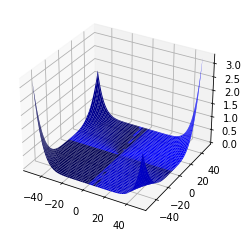

<IPython.core.display.Math object>

1778*x_1^2 + 2*(267*x_1 - 502)*x_2 + 3733*x_2^2 - 2*(1109*x_1 - 2600*x_2 + 1771)*x_4 + 4669*x_4^2 + 930*x_1 + 853


In [22]:
print(dimension)
if dimension==3:
    normf = plot_norm_function_2D(G, lc_cube, lc_LLL)
if dimension==4:
    normf = plot_norm_function_3D(G, lc_cube, lc_LLL, rng=50)


In [23]:
import numpy as np

def determine_conic_type(M):
    # Compute the eigenvalues of the matrix
    eigenvalues = np.linalg.eigvals(M)

    # Sort the eigenvalues in descending order
    eigenvalues = np.sort(eigenvalues)[::-1]

    # Analyze the signs of the eigenvalues
    positive_count = np.sum(eigenvalues > 0)
    negative_count = np.sum(eigenvalues < 0)
    zero_count = np.sum(eigenvalues == 0)

    if positive_count == 3 or negative_count == 3:
        return "Ellipse"
    elif positive_count == 2 and negative_count == 1:
        return "Hyperbola"
    elif positive_count == 1 and negative_count == 2:
        return "Hyperbola (conjugate)"
    elif zero_count == 1:
        if positive_count == 2 or negative_count == 2:
            return "Parabola"
        else:
            return "Pair of parallel lines"
    elif zero_count == 2:
        if np.linalg.matrix_rank(M) == 1:
            return "Pair of intersecting lines"
        else:
            return "Double line"
    elif zero_count == 3:
        return "Point"
    else:
        return "Unknown"


def determine_quadric_type(M):
    # Extract the upper-left 3x3 submatrix
    A = M[:3, :3]

    # Compute the eigenvalues of the submatrix
    eigenvalues = np.linalg.eigvals(A)

    # Sort the eigenvalues in descending order
    eigenvalues = np.sort(eigenvalues)[::-1]

    # Analyze the signs of the eigenvalues
    positive_count = np.sum(eigenvalues > 0)
    negative_count = np.sum(eigenvalues < 0)
    zero_count = np.sum(eigenvalues == 0)

    if positive_count == 3 or negative_count == 3:
        return "Ellipsoid"
    elif (positive_count == 2 and negative_count == 1) or (positive_count == 1 and negative_count == 2):
        return "Hyperboloid"
    elif zero_count == 1:
        if positive_count == 2 or negative_count == 2:
            return "Paraboloid"
        else:
            return "Cone"
    elif zero_count == 2:
        if np.linalg.matrix_rank(M) == 2:
            return "Pair of parallel planes"
        else:
            return "Cylinder"
    elif zero_count == 3:
        if np.linalg.matrix_rank(M) == 1:
            return "Single plane"
        else:
            return "Point"
    else:
        return "Unknown"



print(determine_quadric_type(np.array(G)))
print(determine_conic_type(np.array(G)))

quadric(G, get_index_to_remove(lc_cube, lc_LLL))

# print("all others for a check:")
# for index in range(4):
#     quadric(G, index)

# TODO for some reason, it seems that it does not matter which column is the constant one


Ellipsoid
Unknown
g rank	 Grank	 detG	 gEVsign 3
3 	 4 	 1 	 True
The quadric is an imaginary ellipsoid.



In [24]:
G_multiplied = matrix_multiplication_detailed(G, lc_cube)

print(matrix(G_multiplied))


[  26.49   -8.45   56.76  -74.81]
[  -8.45  250.69  130.09 -372.34]
[  56.76  130.09   853.0 -978.68]
[ -74.81 -372.34 -978.68 1425.83]


# Small matrix of quadric, metricka klasifikace


In [26]:
print(matrix(G))
print(index)

small_matrix = [[elem for j, elem in enumerate(row) if j != index] for row in (G[0:index] + G[index+1:dimension])]

print("Small matrix:\n", matrix(small_matrix))


print("Rank of the small matrix:" , rank(matrix(small_matrix)))
print("Rank of the G matrix:" , rank(matrix(G)))


eigenvalues, eigenvectors = matrix(G).eigenmatrix_right()

print(eigenvalues)
# print(matrix(small_matrix).eigenmatrix_right()[0])
# print(eigenvectors)

[ 1778   267   465 -1109]
[  267  3733  -502  2600]
[  465  -502   853 -1771]
[-1109  2600 -1771  4669]
2
Small matrix:
 [ 1778   267 -1109]
[  267  3733  2600]
[-1109  2600  4669]
Rank of the small matrix: 3
Rank of the G matrix: 4
[43.51769262165604?                  0                  0                  0]
[                 0  877.562748277278?                  0                  0]
[                 0                  0 2704.582071865147?                  0]
[                 0                  0                  0 7407.337487235920?]


## gradient play


In [27]:
x_1, x_2, x_3 = var('x_1 x_2 x_3')
variables = tuple(v for j, v in enumerate([x_1, x_2, x_3]) if j != index)
variables


(x_1, x_2)

In [31]:
from sympy import lambdify

expr_sympy = normf._sympy_()

f = lambdify(variables, expr_sympy, modules=["numpy"])

x = y = np.linspace(-1000, 1000, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(dpi=120)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


: 

In [ ]:
expr_sympy = normf._sympy_()
f = lambdify(variables, expr_sympy, modules=["numpy"])

x = y = np.linspace(-100, 100, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

dZ = np.gradient(Z, x, y)

fig, axe = plt.subplots(figsize=(10, 8))  # adjust size

# reduce arrow density
arrow_density = 3
skip = (slice(None, None, arrow_density), slice(None, None, arrow_density))

# gradient
U = -dZ[0][skip]
V = -dZ[1][skip]
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm

axe.quiver(X[skip], Y[skip], U, V, scale=20, color='pink')

axe.contour(X, Y, Z, 30, cmap="jet")
axe.set_aspect("equal")
axe.grid()

TypeError: can't convert expression to float

Ellipsoid
Unknown
